In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, roc_curve, auc

In [2]:
df_raw = pd.read_csv("rawdata/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace =True)
df_raw = pd.get_dummies(df_raw)

In [5]:
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

df_train_y = df_train["BAD"]
df_train_x = df_train.drop(["BAD"], axis = 1)
df_test_y = df_test["BAD"]
df_test_x = df_test.drop(["BAD"], axis = 1)

In [11]:
model = ["DecisionTree", "RandomForest", "GradientBoosting"]
train_accuracy = []; test_accuracy = []
model_f1_score = []
model_auc = []

In [13]:
dt_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

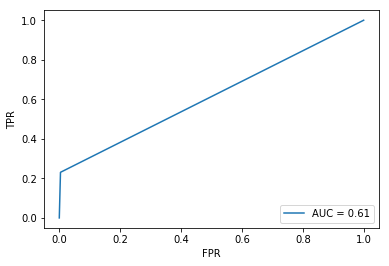

In [16]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [17]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [18]:
rf_model = RandomForestClassifier(max_depth = 4, min_samples_leaf = 20, n_estimators = 100, random_state = 1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

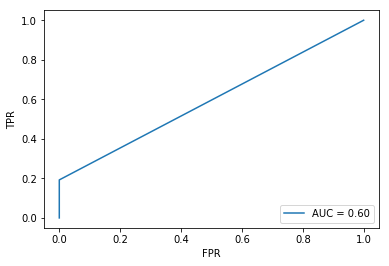

In [19]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [20]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [21]:
gb_final = GradientBoostingClassifier(max_depth = 4, min_samples_leaf = 10, n_estimators = 100, learning_rate = 0.1, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

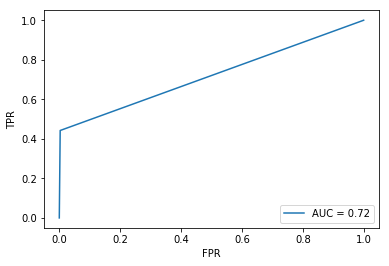

In [22]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [23]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [24]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"]  = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUD"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUD
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720


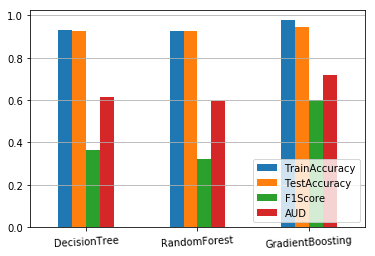

In [27]:
df_eval.plot.bar(rot = 3)
plt.legend(loc="lower right")
plt.grid(axis = "y")